## Introduction

**Introduction**
In this project, Machine Learning algorithms are employed for the purpose of predicting price of diamond based on the gemstone quality and physical properties (such as dimension, color, clarity, etc.)


**Problem statement**


**Objectives**


**Current practice/ solution as it happens in the world market**


**What is offered in this work? (and Use Cases)**
* This work leverages the benefits of Python programming language and machine leanring to model several diamonds physical attributes (such as, carat, cut, quality, dimensions, etc.) in order to realiably predict price of diamond gemstone based on its physical attribues.
* The model can be deployed on a website, or software, or application serving as a trading platform.
* Furthermore, potential users can use the model to plan their budgets before buying their diamond gemstone(s) through prediction of diamond price based on their prefered attributes (such as, diamond carat and size).


**Approach used in this work**
* The original dataset was stratified based on diamond prices, shuffled and then split into two sets, named train set and test set. A deep copy of train set was created and then subjected to exploratory data analysis (EDA) in order to engineer (i.e., explore and then manipulate) the variables and finally select variables that significantly influence diamonds prices. The problem of multiple collinearity between independent variables was observed (multi-collinearity tends to violate the basic assumptions of linear regression); however, multi-collinearity does not affect model prediction accuracy, therefore, the problem can be easily ignored.

* A copy of significant variables in the training set was then created. Data preprocessing involved building a pipeline in order facilitate model building process was created where appropriate transformations (such as, imputation of missing values, standardization of numerical variables, and one hot encoding of categorical variables) were applied on the approriate columns/ variables with the help of a column transformer.

* The regression model was then trained on the processed training-dataset, followed by measuring model performance based on the Root Mean Square Error (RMSE) approach and finally model fine tuning in order to improve overall model prediction accuracy.

# Choosing a Performance Measure

The performance measure that will be employed in this supervised learning problem is the Root Mean Square Error (RMSE), which can be represented mathematically as follows:

$ RMSE =  \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2} $


The RMSE falls in the L^2-norm, which is also known as Euclidean norm. L^2 vector norm is simply a measurement of length between data points by calculating the square root of the squares. The L^2-norm is commonly employed in regression problems; however, care should be taken since its accuracy is affected by the presence and extent of outlier data points.

## Import Libraries and Datasets

### Import Libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import os

%matplotlib inline

print("Library version:")
print(f"Numpy ver. {np.__version__}")
print(f"Matplotlib ver. {mpl.__version__}")
print(f"Seaborn ver. {sns.__version__}")
print(f"Pandas ver. {pd.__version__}")
print(f"Scikit-Learn ver. {sklearn.__version__}")

Library version:
Numpy ver. 1.21.3
Matplotlib ver. 3.5.1
Seaborn ver. 0.11.2
Pandas ver. 1.4.2
Scikit-Learn ver. 1.0.2


### Load Dataset

In [2]:
PATH = "..\Dataset"
DATA = "diamonds.csv"

def load_data(path=PATH, data=DATA, index_col=0):
    datapath = os.path.join(path, data)
    return pd.read_csv(datapath, index_col=index_col)

In [3]:
diamonds = load_data()

In [4]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Rearranging the Dataset

In [5]:
# Modify indices so that they start at zero (0)
new_indices = np.arange(len(diamonds))

diamonds.set_index(new_indices, inplace=True)

In [6]:
# Rearrange attributes (or columns) so that the target attribute (i.e., price) is on the far-right
attributes = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"]

diamonds = diamonds[attributes]

### Data Exploration

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
print("Summary of statistics for numerical attributes:")
diamonds.describe().T

Summary of statistics for numerical attributes:


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


In [9]:
print("Summary of statistics for categorical attributes:")
diamonds.describe(include="O").T

Summary of statistics for categorical attributes:


,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


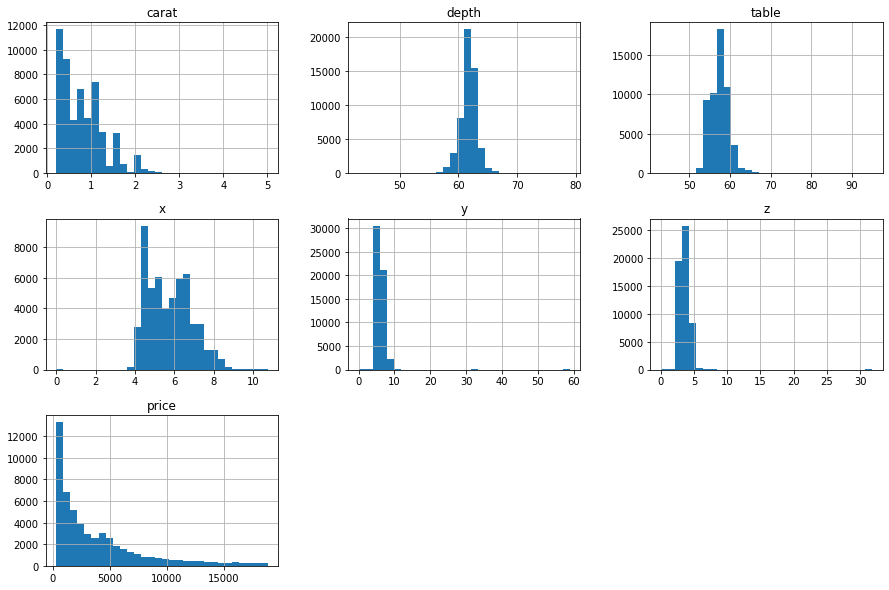

In [10]:
hist_plot = diamonds.hist(figsize=(15,10), bins=30)
plt.show()

### Data Cleaning - Dealing with duplicates

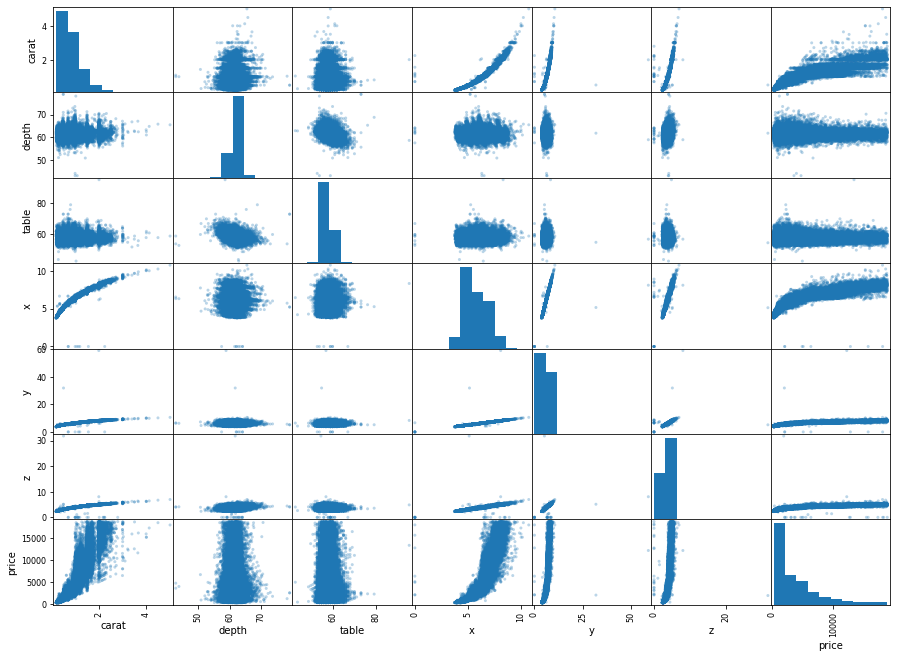

In [11]:
# The scatter matrix below is plotted to visualize data distribution as well as to show correlations that exist between various attributes
# Detailed analysis of the scatter matrix plot is given in the section "Exploration Data Analysis (EDA) and Feature Engineering (FE)"

from pandas.plotting import scatter_matrix
diamonds_scattergram = scatter_matrix(diamonds, figsize=(15,11), alpha=0.3)

**Observations:**
* The scatter matrix plot shows the presence of data quirks which are shown as horizontal lines in most of the carat scattergrams at carat values of about 1.4, 1.5, 2, 2.4, 3 cts, etc. The data quirks could be caused by the presence of duplicate data points.
* In order to prevent the learning algorithm from learning these data quirks, some of these data will be dropped.

#### Drop duplicates 

In [12]:
duplicates = diamonds.duplicated(keep="first")     # Returns indices of duplicate data points
print(f"There are a total of {duplicates.sum()} duplicate data points in the dataset.")

There are a total of 146 duplicate data points in the dataset.


In [13]:
# The duplicates can be viewed by running the following code (first uncomment the code):
# diamonds[duplicates]

In [14]:
diamonds.drop_duplicates(keep="first", inplace=True)

## Splitting the Dataset

Since there is an imbalanced distribution of data especially in the *carat* attribute and the target variable (*price*), the class *StratifiedShuffleSplit* of *sklearn* will be employed in data splitting since it has excellent performance on imbalanced datasets.

* Looking at the histogram plots, *price* is a more tail-heavy distribution (positively skewed) than *carat*, and since it is the target variable, splitting will be done based on diamond prices rather than carats.
* Prior to data splitting, diamonds prices will be converted into discrete values grouped in categories (i.e., binning) using Pandas *cut()* method. In the next cell, summary of statistics for *price* is displayed in order to facilitate this process. The histogram plot of diamonds prices is also useful in deciding bin values.
* The summary of statistics for *price* reveals that the minimum, average, and maximum price values are 326, 3,932.80, and 18,823 USD,respectively. Moreover, the median price value is 2401 USD.

In [15]:
print("Summary of statistics for diamonds prices:\n")
diamonds[["price"]].describe().T

Summary of statistics for diamonds prices:



,count,mean,std,min,25%,50%,75%,max
price,53794.0,3933.065082,3988.11446,326.0,951.0,2401.0,5326.75,18823.0


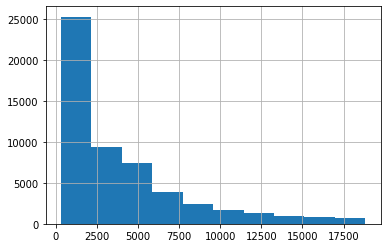

In [16]:
# Visualize diamonds prices distribution 
price_hist = diamonds["price"].hist()

#### Converting the price column into a categorical variable (for data splitting only)
The price column will be binned into 6 categories labeled 1, 2, 3, 4, 5, and 6 in the following range of values in USD:
* Label 1: [0, 700),
* Label 2: [700, 1200),
* Label 3: [1200, 3500),
* Label 4: [3500, 7000),
* Label 5: [7000, 13000), and
* Label 6: [13000, infinity]

The categorical values (range of values) may be considered as low, low-to-moderate, moderate, moderate-to-high, high, and very high diamond price values, respectively.

A new column named *price_category* will be created and used to store the categorical values and later on for data splitting.

In [17]:
diamonds["price_category"] = pd.cut(diamonds["price"],
                               bins=[0, 700, 1200, 3500, 7000, 13000, np.inf],  # price is of int64 dtype, there is no need to use float bin values (e.g., 0., 700., etc.)
                               labels=[1, 2, 3, 4, 5, 6])

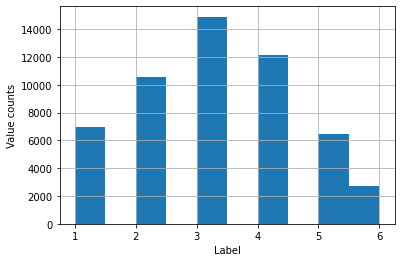

In [18]:
# Visualize data distribution in the price_category column
plt.figure()
plt.xlabel("Label")
plt.ylabel("Value counts")
price_category_hist = diamonds["price_category"].hist()

As it can be observed, the newly created column (*price_category*) has more or less a balanced distribution of data. Data splitting will be performed based on this column.

In [19]:
# Successful StratifiedShuffleSplit operation should attempt to conserve data distribution observed in the targeted column (price_category in this case)
print("Percentage distribution of data in the price_category column:")
total_distr = (diamonds["price_category"].value_counts(sort=False) / len(diamonds)) *100
total_distr

Percentage distribution of data in the price_category column:


1    12.921515
2    19.619288
3    27.701974
4    22.565714
5    12.075696
6     5.115812
Name: price_category, dtype: float64

#### Splitting dataset into train and test sets

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)

In [22]:
for train_index, test_index in split.split(X=diamonds, y=diamonds["price_category"]):
    train_set = diamonds.iloc[train_index]
    test_set = diamonds.iloc[test_index]

In [23]:
print("Percentage data distribution after shuffling and splitting of dataset based on price strata:")
strat_distr = (train_set["price_category"].value_counts(sort=False) / len(train_set)) * 100
strat_distr

Percentage data distribution after shuffling and splitting of dataset based on price strata:


1    12.921004
2    19.619893
3    27.700989
4    22.565830
5    12.076809
6     5.115475
Name: price_category, dtype: float64

In [24]:
# Comparing percentage distributions in the original price_category column and in the stratified train set
percentage_err = strat_distr - total_distr
percentage_err

1   -0.000511
2    0.000605
3   -0.000986
4    0.000116
5    0.001113
6   -0.000337
Name: price_category, dtype: float64

**Observation:**
The percentage error of data distribution in stratified train set compared to the original data distribution in the price_category column is almost negligible. The same can be observed in the startified test set.

In [25]:
# Drop the price_category column in both train_- and test_- sets since it is no longer needed
for set_ in (train_set, test_set):
    set_.drop("price_category", axis=1, inplace=True)

C:\Users\dk\AppData\Local\Temp/ipykernel_76/2151854416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("price_category", axis=1, inplace=True)
C:\Users\dk\AppData\Local\Temp/ipykernel_76/2151854416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("price_category", axis=1, inplace=True)


## Exploration Data Analysis (EDA) and Feature Engineering (FE)

In [26]:
# Create a deep copy of training dataset for EDA
# Deep copy is useful as it prevents us from modifying the initial dataset (train_set in this case)
diamonds = train_set.copy(deep=True)

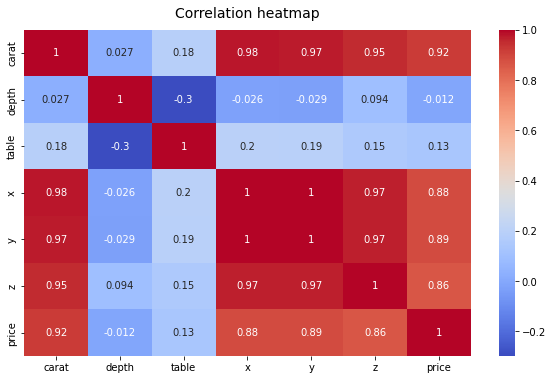

In [27]:
# Correlation analysis using Pearson correlation (linear correlation analysis)
# Pearson correlation coefficient values will be represented on a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(diamonds.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation heatmap", fontsize=14, pad=12)
plt.show()

In the next slides, the scatter matrix plot will be used to visualize linear correlation between strongly-correlated variables (which are carat, x (length), y (width), z (width), and price).

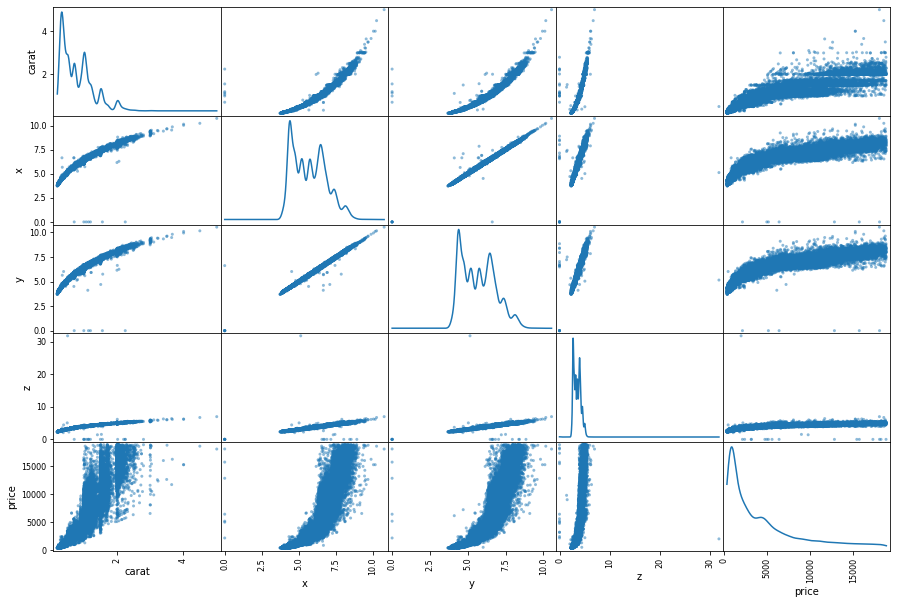

In [28]:
attributes = ["carat", "x", "y", "z", "price"]

scatterMatrixPlot = scatter_matrix(diamonds[attributes], diagonal="kde", alpha=0.5, figsize=(15,10))
plt.show()

**Observations:**
* There is evidence of a strong positive correlation between diamonds prices and attributes such as carat, and diamonds dimensions (x, y, and z).
* A desired narrow data distribution of z, y, and x attributes can also be observed in the scatter matrix plot.
* Data quirks are still present in the scatter plot of price against carat at carat values of about 1.4, 1.5, 2, 3 cts, etc. These data quirks will be dealt with in model fine tuning by essentially dropping the respective data.
* Several outlier points can be seen on the plot - on all attributes. Like data quirks, outliers will also be dealt with in model fine tuning.
* The main diagonal plots show Kernel Density Estimate (KDE) plots (KDE plot uses continuous probability density curve to visualize data distribution) - because correlation plot of a particular variable by itself has no useful meaning.

#### Handling the problem of Multi-collinearity

* The correlation heatmap as well as the correlation matrix plots have shown that there is strong positive correlation between several attributes (carat, x, y, and z).
* Multi-collinearity violates one of the assumptions of regression analysis, which requires that all significant exploratory variables must be independent from one another. Any change in value of one of the multi-correlated variable affects values of other variables, that is, causing changes in values of other multi-correlated variables.
* Therefore, one way to solve the problem of multi-collinearity is to select only one of the multi-correlated variables which will be used for learning as well as model building process, and dropping other multi-correlated variables.

In [29]:
# Function to identify multi-correlated variables based on some threshld value set by the user

def multi_corr_feats(dataset, corr_method="pearson", threshold=0.7):
    multi_corr_cols = set()     # Will be used to store set of columns that are multi-correlated
    corr_matrix = dataset.corr(method=corr_method)
    for i in np.arange(len(corr_matrix.columns)):
        for j in np.arange(i):
            if np.abs(corr_matrix.iloc[i, j]) > threshold:    # Ensures that even negative correlations will be considered
                col_name = corr_matrix.columns[i]
                multi_corr_cols.add(col_name)
    return multi_corr_cols

In [30]:
print("The following column(s) are multi-correlated:")
multi_corr_feats(diamonds.drop("price", axis=1), corr_method="pearson", threshold=0.7)

The following column(s) are multi-correlated:


{'x', 'y', 'z'}

Following the above findings of the multi_corr_feats() function, the returned columns will be dropped from both training and test sets.

In [31]:
cols_to_drop = ["y", "z"]

for col in cols_to_drop:
    train_set.drop(col, axis=1, inplace=True)
    test_set.drop(col, axis=1, inplace=True)

# Data Preprocessing

## Creating a Pipeline and a Column Transformer

Most machine learning algorithms that rely on distance measurements cannot perform on categorical variables/ values. Therefore, in order to avoid dropping significant categorical attribues, categorical values will be encoded (that is, assigned certain numerical (particularly nominal) values.

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [33]:
# Split columns of training dataset into attributes and the target variable
X_train = train_set.drop("price", axis=1)     # training dataset containing features
y_train = train_set["price"].copy()           # target training set

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45724 entries, 38420 to 20610
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    45724 non-null  float64
 1   cut      45724 non-null  object 
 2   color    45724 non-null  object 
 3   clarity  45724 non-null  object 
 4   depth    45724 non-null  float64
 5   table    45724 non-null  float64
 6   x        45724 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.8+ MB


In [35]:
# Identifying and classifying features into numerical and categorical features
num_feats = ["carat"]     # numeric features -> will be subjected to standard scaling
cat_feats= ["cut", "color", "clarity"]                     # categorical features -> one hot encoding will be applied

In [36]:
# Specifying pipelines for each classification
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

In [37]:
# Subjecting each pipeline to the column transformer
preprocess_pipeline = ColumnTransformer([
    ("cont", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats),
    ], remainder="passthrough",
)

In [38]:
diamonds_prepared = preprocess_pipeline.fit_transform(X_train)

# Model Selection and Training

## Linear Regression

* Linear regression is simply a linear regression model and is considered to be one of the simplest machine learning model.
* Linear regression model tries to map independent variable(s) to a dependent variable based on a linear relationship that exist between them.
* Therefore, this model is not considered to be powerful compared to other models such as Decision Tree Regressor (the decision tree regressor is capable of analyzing complex non-linear relationship between independent variables and the dependent variable).

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Linear Regression

In [40]:
# Create model object
lin_reg = LinearRegression()

In [41]:
# Fit the model
lin_reg.fit(diamonds_prepared, y_train)

LinearRegression()

In [42]:
# Perform predictions on the prepared dataset
lin_predictions = lin_reg.predict(diamonds_prepared)

In [43]:
# Measure model performance
lin_mse = mean_squared_error(y_train, lin_predictions)

In [44]:
# Training score for Lin reg model
lin_rmse = np.sqrt(lin_mse)
np.round(lin_rmse, 4)

1127.6297

### Decision Tree Regressor

In [45]:
tree_reg = DecisionTreeRegressor()

In [46]:
tree_reg.fit(diamonds_prepared, y_train)

DecisionTreeRegressor()

In [47]:
tree_predictions = tree_reg.predict(diamonds_prepared)

In [48]:
tree_mse = mean_squared_error(y_train, tree_predictions)

In [49]:
tree_rmse = np.sqrt(tree_mse)

In [50]:
# Training score for Dec tree reg model
np.round(tree_rmse, 4)

12.2994

**Discussion:**
* The root mean squared error (RMSE) of the linear regression model suggests that there is a possible underfitting of the model; the spread of about 1129.7969 USD is relatively large.
* The Decision tree regression model, which is more powerful than the former, has a very small small RMSE value of about 7.55 USD. There could possibly be overfitting of the data.
* In the next cells, the calculated training scores of both linear regression model and decision tree regressor will be evaluated against the 10-fold validation scores of each respective model.

### Model Evaluation using K-fold Cross-Validation: Linear Regression

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(lin_reg, diamonds_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)

In [53]:
lin_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print(f"Scores: {np.round(scores, 4)}")
    print(f"Mean: {np.round(scores.mean(), 4)}")
    print(f"Standard deviation: {np.round(scores.std(), 4)}")

In [55]:
# Evaluation scores for lin reg model
display_scores(lin_rmse_scores)

Scores: [1161.3725 1080.9033 1109.7091 1144.9654 1161.209  1136.8665 1110.0311
 1113.9382 1142.5939 1122.9851]
Mean: 1128.4574
Standard deviation: 24.2741


**Discussion:**
* The linear regression model has an average evaluation score of about 1130.92 USD with a standard deviation of 28.02 USD between scores (1130.92 $\pm$ 28.02 USD).
* The difference between the training score (=1129.7969 USD) and the average evaluation score (=1130.9228 USD) for the linear regression model is negligible, and both RMSE scores are fairly large.
* It is thus concluded that the linear regression model underfits the data.

### K-fold cross validation on the Decision Tree Regressor

In [56]:
scores = cross_val_score(tree_reg, diamonds_prepared, y_train,
                        scoring="neg_mean_squared_error", cv=10)

In [57]:
tree_rmse_scores = np.sqrt(-scores)

In [58]:
# Evaluation scores for decision tree regressor
display_scores(tree_rmse_scores)

Scores: [740.4005 751.0887 741.2953 733.5979 759.9665 751.1398 764.5335 738.796
 790.9224 729.6107]
Mean: 750.1351
Standard deviation: 17.2212


**Discussion:**
* The average RMSE evaluation score of the decision tree regressor is 749.67 $\pm$ 24.40 USD.
* Compared to the training score of about 7.5513 USD of the same model, it is now evident that the decision tree regressor overfits the data.

## Training and Evaluating a Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
forest_reg = RandomForestRegressor()

In [61]:
forest_reg.fit(diamonds_prepared, y_train)

RandomForestRegressor()

In [62]:
forest_predictions = forest_reg.predict(diamonds_prepared)

In [63]:
forest_mse = mean_squared_error(y_train, forest_predictions)

In [64]:
forest_rmse = np.sqrt(forest_mse)
np.round(forest_rmse, 4)

207.5937

In [65]:
scores = cross_val_score(forest_reg, diamonds_prepared, y_train,
                        scoring="neg_mean_squared_error", cv=10)

In [66]:
forest_rmse_scores = np.sqrt(-scores)

In [67]:
display_scores(forest_rmse_scores)

Scores: [548.187  538.9544 549.4943 552.4996 560.0423 544.5606 571.1152 557.5933
 573.2978 562.7576]
Mean: 555.8502
Standard deviation: 10.6256


**Discussion:**
* The ensemble method Random Forest Regression reveal promising results than the previous models.
* There is a relatively low difference between the training score (=204.2143 USD) and the average evaluation score (=551.4515 USD).

# Model Fine-Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6]}
]

In [70]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [71]:
grid_search.fit(diamonds_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

**Discussion**

Since both returned values of best parameters (i.e., max_features = 6, and n_estimators=30) were the maximum set values, higher values should be explored in further fine-tuning procedures.

# Testing the Model on the Test Set

In [74]:
model = grid_search.best_estimator_

In [75]:
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

In [76]:
X_test_prepared = preprocess_pipeline.transform(X_test)

In [77]:
y_test_predictions = model.predict(X_test_prepared)

In [78]:
final_mse = mean_squared_error(y_test, y_test_predictions)

In [80]:
final_rmse = np.sqrt(final_mse)
print(final_rmse)

575.040579278673


### Population Estimate of the Generalization Error

In [82]:
from scipy import stats

In [83]:
confidence = 0.95

In [85]:
squared_errors = (y_test_predictions - y_test)**2

In [92]:
gen_error = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

print(f"The generalization error lies between {np.round(gen_error[0], 4)} USD and {np.round(gen_error[1], 4)} USD at {confidence*100}% confidence level.")

The generalization error lies between 546.5222 USD and 602.2099 USD at 95.0% confidence level.


## Conclusion and Recommendations

* Among the three regression models trained on the dataset, the random forest regressor has shown remarkable performance in predicting diamonds prices.
* The simplest regression model, linear regression, was underfitting the data. On the other hand, due to some of its associated errors, the decision tree regressor was proved to be overfitting the data; both cases generally lead to high generalization errors on the test set and fresh data.
* It is confident that, at 95% confidence level, the generalization error is bound between 546.52 USd and 602.21 USD. Given the range of price data distribution, this population estimate is fair and acceptable.

* Albeit training and fine-tuning ensemble ML models require massive computational capacity, it is recommended that the model should be fine-tuned further with the GridSearchCV functionality. 